In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset=pd.read_csv("/content/sample_data/train (2).csv")
dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df=pd.DataFrame(dataset)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df.shape

(159571, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
df.isnull().sum()

,0
id,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [8]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [9]:
toxic_col=[ 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']
df["label"]=df[toxic_col].any(axis=1).astype(int)

In [10]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


In [11]:
df.drop(["id",'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],axis=1,inplace=True)

In [12]:
df.head()

,comment_text,label
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [13]:
df_small=df.sample(50000,random_state=42)

In [ ]:
! pip install tensorflow

In [ ]:
! pip install transformers

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_small["comment_text"].tolist(),df_small["label"].tolist(),test_size=0.2,random_state=42)

In [15]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(x_train, truncation=True, padding='max_length',max_length=128, return_tensors="tf")
val_encodings = tokenizer(x_test, truncation=True, padding='max_length',max_length=128,return_tensors="tf" )

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


In [16]:
from tensorflow .keras.models import Model #type:ignore
from tensorflow.keras.layers import Input,Dense,Dropout #type:ignore
from transformers import TFBertModel

In [17]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings),y_train)).batch(8)

val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings),y_test)).batch(8)

In [18]:
class ToxicCommentClassifier(Model):
    def __init__(self, dropout_rate=0.3):
        super(ToxicCommentClassifier, self).__init__()
        self.bert = TFBertModel.from_pretrained('bert-base-uncased')
        self.dropout = Dropout(dropout_rate)
        self.classifier = Dense(1, activation='sigmoid')

    def call(self, inputs, training=False):
        outputs = self.bert(inputs)
        cls_output = outputs.last_hidden_state[:, 0, :]
        x = self.dropout(cls_output, training=training)
        return self.classifier(x)

model = ToxicCommentClassifier()


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were 

In [19]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping #type:ignore

early_stop = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

history = model.fit(train_dataset,validation_data=val_dataset,epochs=3,callbacks=[early_stop])


Epoch 1/3
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 389s 73ms/step - accuracy: 0.8579 - loss: 0.3808 - val_accuracy: 0.9054 - val_loss: 0.2479
Epoch 2/3
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 376s 72ms/step - accuracy: 0.9051 - loss: 0.2520 - val_accuracy: 0.9241 - val_loss: 0.2099
Epoch 3/3
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 361s 72ms/step - accuracy: 0.9196 - loss: 0.2168 - val_accuracy: 0.9307 - val_loss: 0.1911


In [21]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


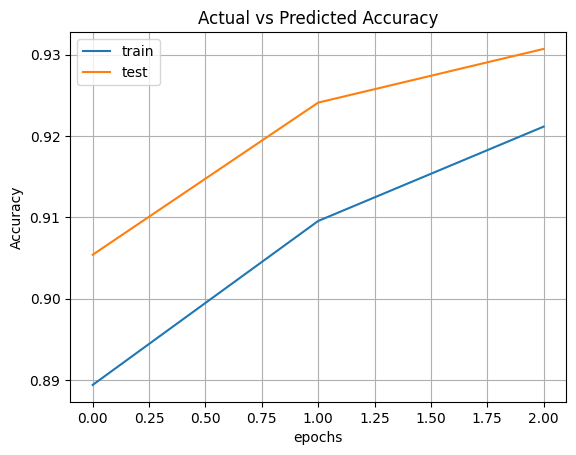

In [22]:
plt.plot(history.history["accuracy"],label="train")
plt.plot(history.history["val_accuracy"],label="test")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Actual vs Predicted Accuracy")
plt.grid(True)
plt.legend()
plt.show()

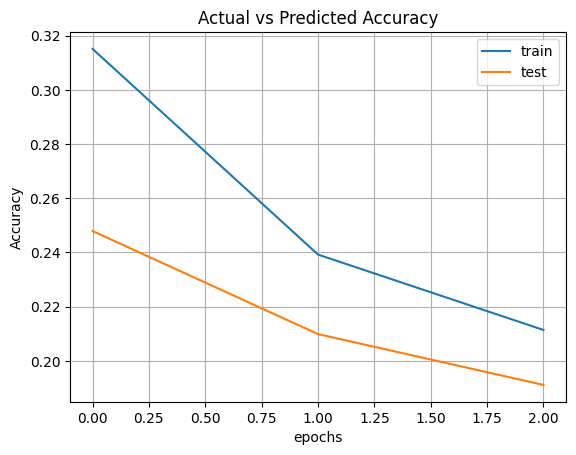

In [23]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="test")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Actual vs Predicted Accuracy")
plt.grid(True)
plt.legend()
plt.show()

In [24]:
loss, accuracy = model.evaluate(val_dataset)
print(f"Validation Accuracy: {accuracy:.2f}")
print(f"loss: {loss:.2f}")

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 74s 59ms/step - accuracy: 0.9360 - loss: 0.1847
Validation Accuracy: 0.93
loss: 0.19


In [25]:
loss, accuracy = model.evaluate(train_dataset)
print(f"Train Accuracy: {accuracy:.2f}")
print(f"loss: {loss:.2f}")

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 292s 58ms/step - accuracy: 0.9288 - loss: 0.1956
Train Accuracy: 0.93
loss: 0.20


In [26]:
# Get predicted probabilities from model
pred_probs = model.predict(val_dataset)
print(type(pred_probs))
print(pred_probs.shape)
pred_labels = (pred_probs.flatten() > 0.5).astype(int)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 58ms/step
<class 'numpy.ndarray'>
(10000, 1)


In [27]:
import numpy as np
true_labels = []
for batch in val_dataset:
    true_labels.extend(batch[1].numpy())  # batch[1] contains labels
true_labels = np.array(true_labels)

In [28]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, pred_labels, target_names=["Real", "Fake"]))

              precision    recall  f1-score   support

        Real       0.93      0.99      0.96      9011
        Fake       0.86      0.36      0.50       989

    accuracy                           0.93     10000
   macro avg       0.90      0.67      0.73     10000
weighted avg       0.93      0.93      0.92     10000



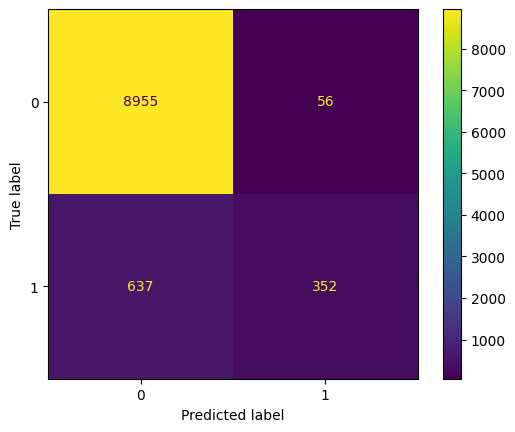

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, pred_labels)
ConfusionMatrixDisplay(cm).plot()
plt.show()

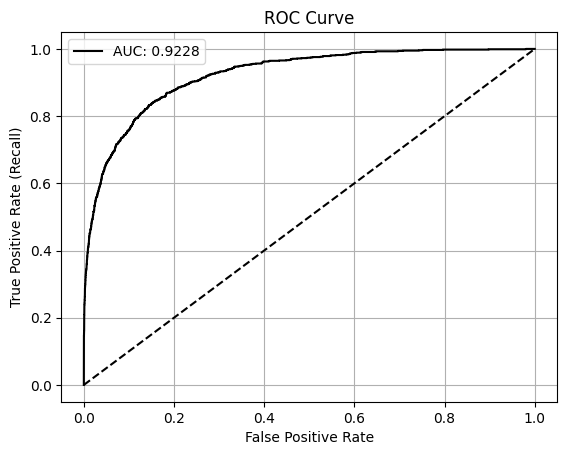

In [31]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(true_labels, pred_probs)

plt.plot(fpr, tpr, color='black', label=f"AUC: {round(roc_auc_score(true_labels,pred_probs),4)}")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
from sklearn.metrics import precision_score
Precision_score=precision_score(true_labels,pred_labels)
print(Precision_score)

0.8627450980392157


In [33]:
from sklearn.metrics import recall_score
Recall_score=recall_score(true_labels,pred_labels)
print(Precision_score)

0.8627450980392157


In [35]:
from sklearn.metrics import f1_score
F1_score=f1_score(true_labels,pred_labels)
print(F1_score)

0.5039370078740157
